## Predict whether a person has diabetes or not

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
df=pd.read_csv("Kaggle_diabetes_dataset.csv")

### Exploring Dataset

In [3]:
df.shape

(2000, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
#missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#handling zero values
df1=df.copy(deep=True)
df1[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]=df1[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.nan)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0,NaN,NaN,31.2,0.382,42,0
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [10]:
df1.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df1.mean()

Pregnancies                   3.703500
Glucose                     121.975340
BloodPressure                72.403665
SkinThickness                29.341275
Insulin                     153.743295
BMI                          32.650101
DiabetesPedigreeFunction      0.470930
Age                          33.090500
Outcome                       0.342000
dtype: float64

In [12]:
df1.median()

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                29.000
Insulin                     126.000
BMI                          32.400
DiabetesPedigreeFunction      0.376
Age                          29.000
Outcome                       0.000
dtype: float64

In [13]:
#handling null values
df1["Glucose"].fillna(df1["Glucose"].mean(),inplace=True)
df1["BloodPressure"].fillna(df1["BloodPressure"].mean(),inplace=True)
df1["SkinThickness"].fillna(df1["SkinThickness"].mean(),inplace=True)
df1["Insulin"].fillna(df1["Insulin"].mean(),inplace=True)
df1["BMI"].fillna(df1["BMI"].mean(),inplace=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

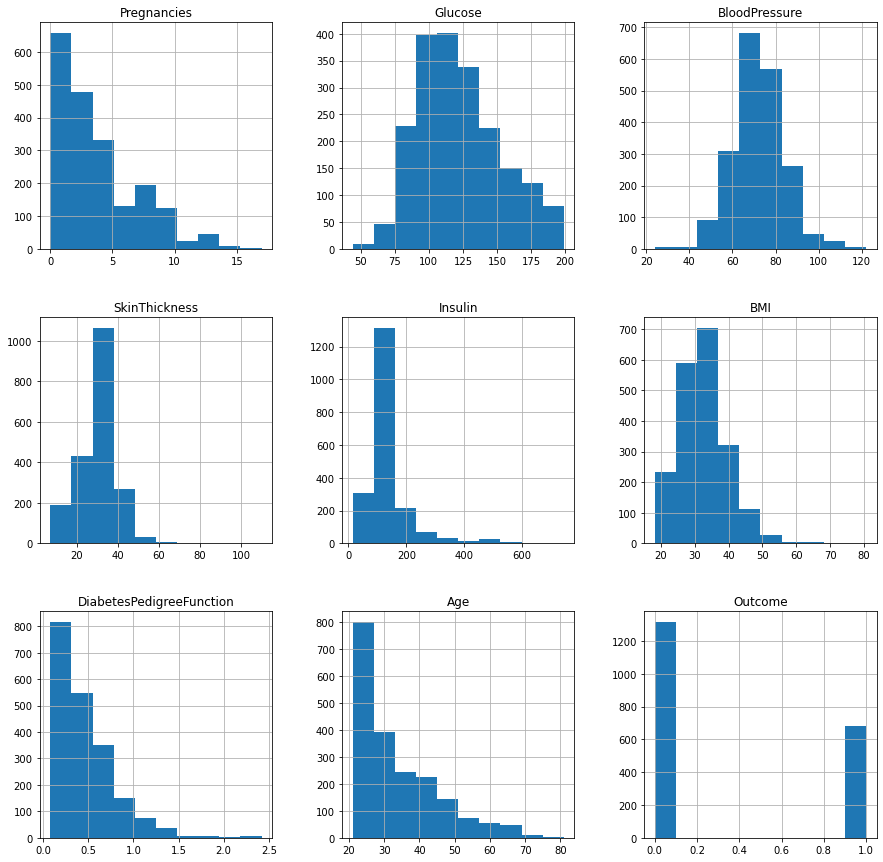

In [14]:
# checking the distribution of individual features
df1.hist(figsize=(15,15))

In [15]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns='Outcome')
y = df1['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print(f"x_train size: {x_train.shape}, x_test size: {x_test.shape}")
print(f"y_train size: {y_train.shape}, y_test size: {y_test.shape}")

x_train size: (1600, 8), x_test size: (400, 8)
y_train size: (1600,), y_test size: (400,)


In [16]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

### to find best algorithm using GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [18]:
# Creating a function to calculate best model for this data
def find_best_model(x, y):
    models = {
        'logistic_regression': {'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
                                'parameters': {'C': [1,5,10]}
                                 },
        
        'decision_tree': { 'model': DecisionTreeClassifier(splitter='best'),
                            'parameters': {'criterion': ['gini', 'entropy'],'max_depth': [5,10]}
                            },
        
        'random_forest': {'model': RandomForestClassifier(criterion='gini'),
                            'parameters': { 'n_estimators': [10,15,20,50,100,200] }
                            },
        
        'svm': {'model': SVC(gamma='auto'),
                   'parameters': {'C': [1,10,20],'kernel': ['rbf','linear']  }
                    }

                }
    
    scores = [] 

        
    for model_name, model_params in models.items():
        g= GridSearchCV(model_params['model'], model_params['parameters'], cv = 5, return_train_score=False)
        g.fit(x, y)
        scores.append({
                    'model': model_name,
                    'best_parameters': g.best_params_,
                    'score': g.best_score_
                    })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
find_best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.771250
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.890625
2,random_forest,{'n_estimators': 200},0.954375
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.867500


##### Since here the Random Forest algorithm has the highest accuracy, we futher use it to make predictions.

In [19]:
# Creating Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=0)
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(n_estimators=20, random_state=0)

### Model Evaluation

In [20]:
#confusion matrrix for train set

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_train_pred=rf_classifier.predict(x_train)
conf_matrix=confusion_matrix(y_train,y_train_pred)
conf_matrix


array([[1043,    1],
       [   1,  555]], dtype=int64)

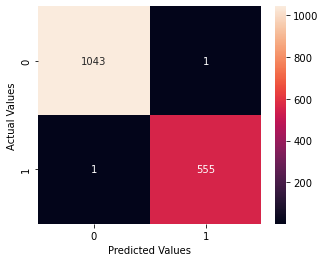

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt="g")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [22]:
#classification report 
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      1.00      1.00       556

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [23]:
#confusion matrrix for test set

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=rf_classifier.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix


array([[271,   1],
       [  3, 125]], dtype=int64)

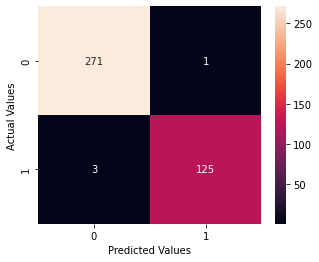

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt="g")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       0.99      0.98      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



### To get predictions

In [26]:
def diabetes_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,DiabetesPedigreeFunction, Age):
    Preg = int(Pregnancies)
    glucose = float(Glucose)
    BP = float(BloodPressure)
    ST = float(SkinThickness)
    Insulin = float(Insulin)
    BMI = float(BMI)
    DPF = float(DiabetesPedigreeFunction)
    Age = int(Age)

    x = [[Preg, glucose,BP, ST, Insulin, BMI,DPF, Age]]
    x = st.transform(x)

    return rf_classifier.predict(x)


In [27]:
# Prediction 1
print("Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age")
print("-"*50)
prediction = diabetes_prediction(2, 81, 72, 15, 76, 30.1, 0.547, 35)
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")
print("-"*50)

Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
--------------------------------------------------
Great! You don't have diabetes.
--------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
# Prediction 2
print("Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,DiabetesPedigreeFunction), Age")
print("-"*50)
prediction = diabetes_prediction(0, 117, 88, 22, 145, 33.5, 0.403, 30)
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")
print("-"*50)

Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,DiabetesPedigreeFunction), Age
--------------------------------------------------
Oops! You have diabetes.
--------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
